Importing all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data importing and merging into single file

In [ ]:
df_User = pd.read_excel("User.xlsx")
df_Type = pd.read_excel("Type.xlsx")
df_Transaction = pd.read_excel("Transaction.xlsx")
df_Region = pd.read_excel("Region.xlsx")
df_Mode = pd.read_excel("Mode.xlsx")
df_Item = pd.read_excel("Item.xlsx")
df_Country = pd.read_excel("Country.xlsx")
df_Continent = pd.read_excel("Continent.xlsx")
df_City = pd.read_excel("City.xlsx")

In [ ]:
df_user_final = df_User \
    .merge(df_Continent, on="ContinentId", how="left") \
    .merge(df_Region, on="RegionId", how="left") \
    .merge(df_Country, on="CountryId", how="left") \
    .merge(df_City, on="CityId", how="left")

In [ ]:
df_user_final.head()

,UserId,ContinentId_x,RegionId_x,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y
0,14,5,20,155,220.0,Europe,Southern Europe,5,Portugal,20,Lagos,27.0
1,16,3,14,101,3098.0,Asia,South East Asia,3,Indonesia,14,Jakarta,101.0
2,20,4,15,109,4303.0,Australia & Oceania,Australia,4,Australia,15,Gold Coast,109.0
3,23,1,4,22,154.0,Africa,Southern Africa,1,South Africa,4,Meyerton,22.0
4,25,3,14,101,3098.0,Asia,South East Asia,3,Indonesia,14,Jakarta,101.0


In [ ]:
df_Transaction.rename(columns={"VisitMode":"VisitModeId"}, inplace=True)

In [ ]:
df_Transaction_final = df_Transaction \
    .merge(df_Item, on="AttractionId", how="left")\
    .merge(df_Mode, on="VisitModeId", how="left")

In [ ]:
df_final = df_Transaction_final.merge(df_user_final, on="UserId", how="left")

In [ ]:
df_final.isna().sum()

,0
TransactionId,0
UserId,0
VisitYear,0
VisitMonth,0
VisitModeId,0
AttractionId,0
Rating,0
AttractionCityId,0
AttractionTypeId,0
Attraction,0


In [ ]:
df_final

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,RegionId_x,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,21,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,8,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,9,54,774.0,America,South America,2,Brazil,9,Brazil,51.0
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,17,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,21,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,21,159,7460.0,Europe,Western Europe,5,France,21,Lyon,159.0
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,17,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,17,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,17,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0


In [ ]:
df_final['VisitDate']= pd.to_datetime(df_final['VisitYear'].astype(str) + '-' + df_final['VisitMonth'].astype(str)+ '-01')

In [ ]:
df_final

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,54,774.0,America,South America,2,Brazil,9,Brazil,51.0,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,159,7460.0,Europe,Western Europe,5,France,21,Lyon,159.0,2018-09-01
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01


In [ ]:
df_final.dtypes

,0
TransactionId,int64
UserId,int64
VisitYear,int64
VisitMonth,int64
VisitModeId,int64
AttractionId,int64
Rating,int64
AttractionCityId,int64
AttractionTypeId,object
Attraction,object


In [ ]:
#checking unique values to spot typos, inconsistent formatting, or unexpected categories.

In [ ]:
print(df_final['CityName'].unique())
print(df_final['VisitMode'].unique())
print(df_final['Attraction'].unique())

['Guildford' 'Ontario' 'Brazil' ... 'Argentina' 'Binfield'
 'Bratislava Region']
['Couples' 'Friends' 'Family' 'Solo' 'Business']
['Sacred Monkey Forest Sanctuary' 'Waterbom Bali' 'Seminyak Beach'
 'Nusa Dua Beach' 'Sanur Beach' 'Uluwatu Temple' 'Tegalalang Rice Terrace'
 'Tegenungan Waterfall' 'Tanah Lot Temple' 'Kuta Beach - Bali'
 'Bromo Tengger Semeru National Park' 'Mount Semeru Volcano'
 'Jodipan Colorful Village' 'Sempu Island' 'Balekambang Beach'
 'Coban Rondo Waterfall' 'Goa Cina Beach' 'Malang City Square'
 'Museum Malang Tempo Doeloe' 'Khayangan Reflexology & Massage'
 'Jomblang Cave' 'Kalibiru National Park' 'Malioboro Road'
 'Merapi Volcano' 'Ramayana Ballet at Prambanan' 'Ratu Boko Temple'
 'Sewu Temple' 'Ullen Sentalu Museum' 'Water Castle (Tamansari)'
 'Yogyakarta Palace']


In [ ]:
df_final['CityName'] = df_final['CityName'].str.strip().str.title()
df_final['VisitMode'] = df_final['VisitMode'].str.strip().str.upper()

In [ ]:
df_final.dropna(inplace=True)

In [ ]:
df_final.dtypes

,0
TransactionId,int64
UserId,int64
VisitYear,int64
VisitMonth,int64
VisitModeId,int64
AttractionId,int64
Rating,int64
AttractionCityId,int64
AttractionTypeId,object
Attraction,object


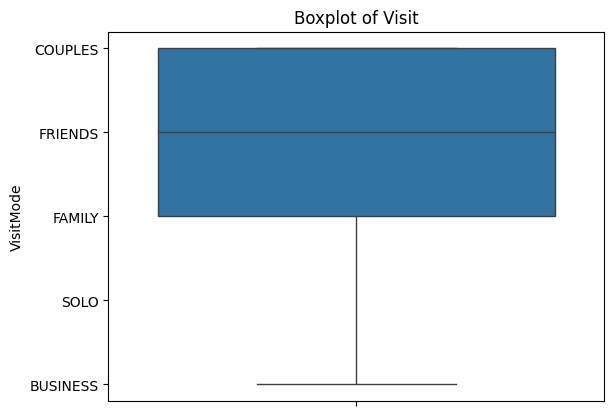

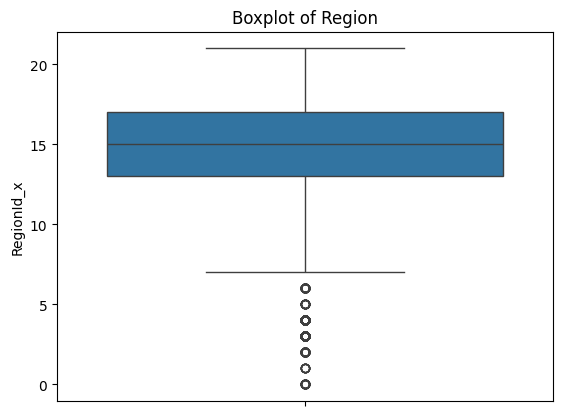

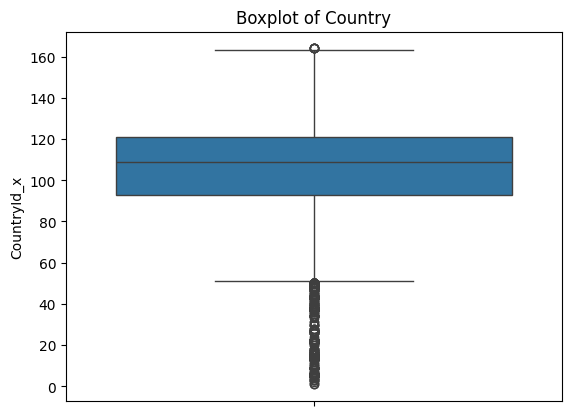

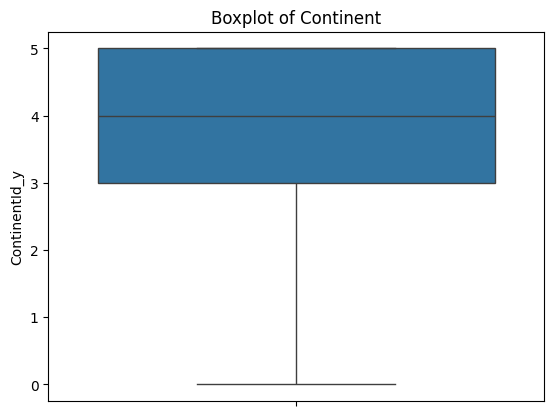

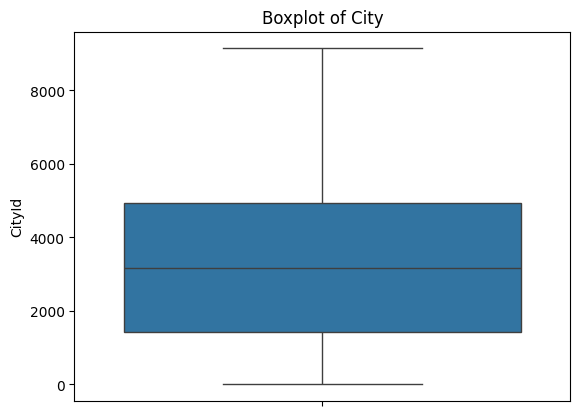

In [ ]:
# Checking for outliers
sns.boxplot(y=df_final['VisitMode'])
plt.title('Boxplot of Visit')
plt.show()

sns.boxplot(y=df_final['RegionId_x'])
plt.title('Boxplot of Region')
plt.show()

sns.boxplot(y=df_final['CountryId_x'])
plt.title('Boxplot of Country')
plt.show()

sns.boxplot(y=df_final['ContinentId_y'])
plt.title('Boxplot of Continent')
plt.show()

sns.boxplot(y=df_final['CityId'])
plt.title('Boxplot of City')
plt.show()



From the above Boxplot shows that column Region and country has outliers, so eliminating the outliers in the dataset

In [ ]:
Q1 = df_final['CountryId_x'].quantile(0.25)
Q3 = df_final['CountryId_x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_final[(df_final['CountryId_x'] < lower_bound) | (df_final['CountryId_x'] > upper_bound)]
print(outliers[['CountryId_x', 'Country']])

       CountryId_x       Country
1               48        Canada
6                9      Tanzania
8               22  South Africa
22              22  South Africa
37              14         Egypt
...            ...           ...
52289           48        Canada
52531           48        Canada
52532           48        Canada
52593           48        Canada
52916           48        Canada

[2610 rows x 2 columns]


In [ ]:
Q1 = df_final['RegionId_x'].quantile(0.25)
Q3 = df_final['RegionId_x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_final[(df_final['RegionId_x'] < lower_bound) | (df_final['RegionId_x'] > upper_bound)]
print(outliers[['RegionId_x', 'Region']])

       RegionId_x           Region
6               2      East Africa
8               4  Southern Africa
22              4  Southern Africa
37              3     North Africa
55              4  Southern Africa
...           ...              ...
51239           6        Caribbean
51240           6        Caribbean
51241           6        Caribbean
51576           5      West Africa
51668           4  Southern Africa

[1004 rows x 2 columns]


In [ ]:
Q1 = df_final['RegionId_x'].quantile(0.25)
Q3 = df_final['RegionId_x'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_final = df_final[(df_final['RegionId_x'] >= lower) & (df_final['RegionId_x'] <= upper)]

Q1 = df_final['CountryId_x'].quantile(0.25)
Q3 = df_final['CountryId_x'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_final = df_final[(df_final['CountryId_x'] >= lower) & (df_final['CountryId_x'] <= upper)]

In [ ]:
df_final

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,54,774.0,America,South America,2,Brazil,9,Brazil,51.0,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,159,7460.0,Europe,Western Europe,5,France,21,Lyon,159.0,2018-09-01
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01


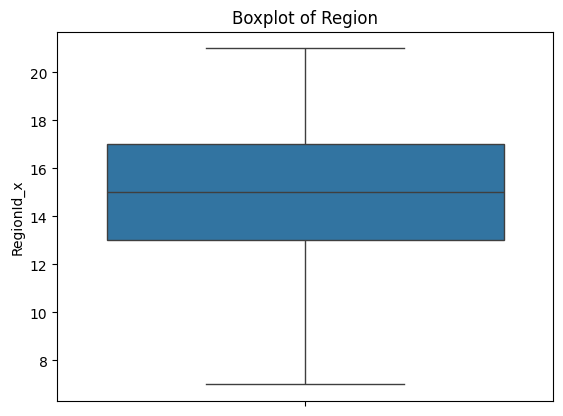

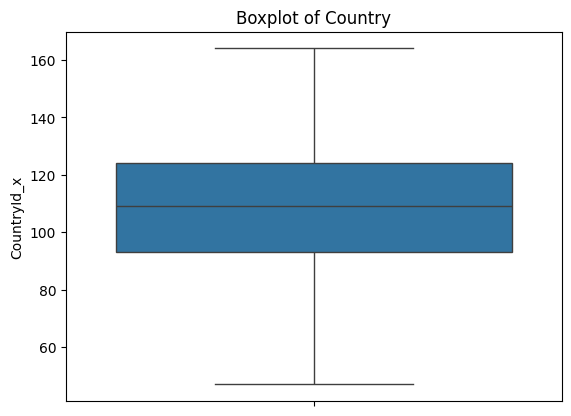

In [ ]:
sns.boxplot(y=df_final['RegionId_x'])
plt.title('Boxplot of Region')
plt.show()

sns.boxplot(y=df_final['CountryId_x'])
plt.title('Boxplot of Country')
plt.show()

In [ ]:
df_final.dtypes

,0
TransactionId,int64
UserId,int64
VisitYear,int64
VisitMonth,int64
VisitModeId,int64
AttractionId,int64
Rating,int64
AttractionCityId,int64
AttractionTypeId,object
Attraction,object


In [ ]:
#spiliting data into categorical and numerical
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns

In [ ]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'AttractionCityId', 'ContinentId_x',
       'RegionId_x', 'CountryId_x', 'CityId', 'ContinentId_y', 'RegionId_y',
       'CountryId_y'],
      dtype='object')
Categorical columns: Index(['AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitMode',
       'Continent', 'Region', 'Country', 'CityName'],
      dtype='object')


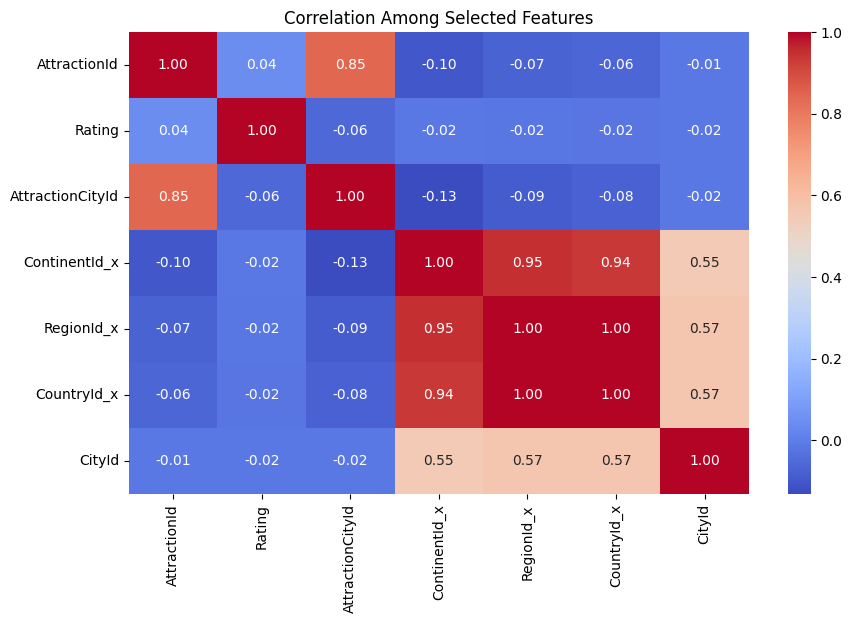

In [ ]:
corr_col = ['AttractionId', 'Rating', 'AttractionCityId', 'ContinentId_x', 'RegionId_x', 'CountryId_x', 'CityId']
corr_matrix = df_final[corr_col].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Among Selected Features")
plt.show()

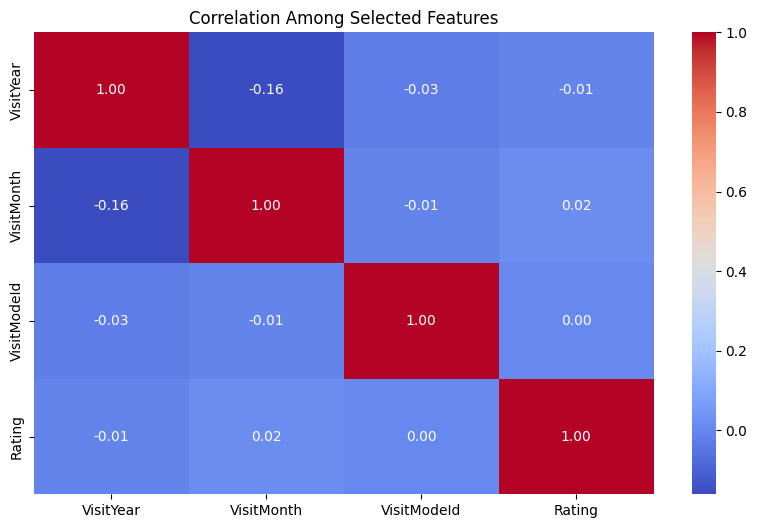

In [ ]:
corr_col_1 = ['VisitYear', 'VisitMonth', 'VisitModeId', 'Rating']
corr_matrix = df_final[corr_col_1].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Among Selected Features")
plt.show()

In [ ]:
df_copy = df_final.copy()

In [ ]:
df_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,54,774.0,America,South America,2,Brazil,9,Brazil,51.0,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,159,7460.0,Europe,Western Europe,5,France,21,Lyon,159.0,2018-09-01
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01


In [ ]:
df=df_final.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numerical features
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

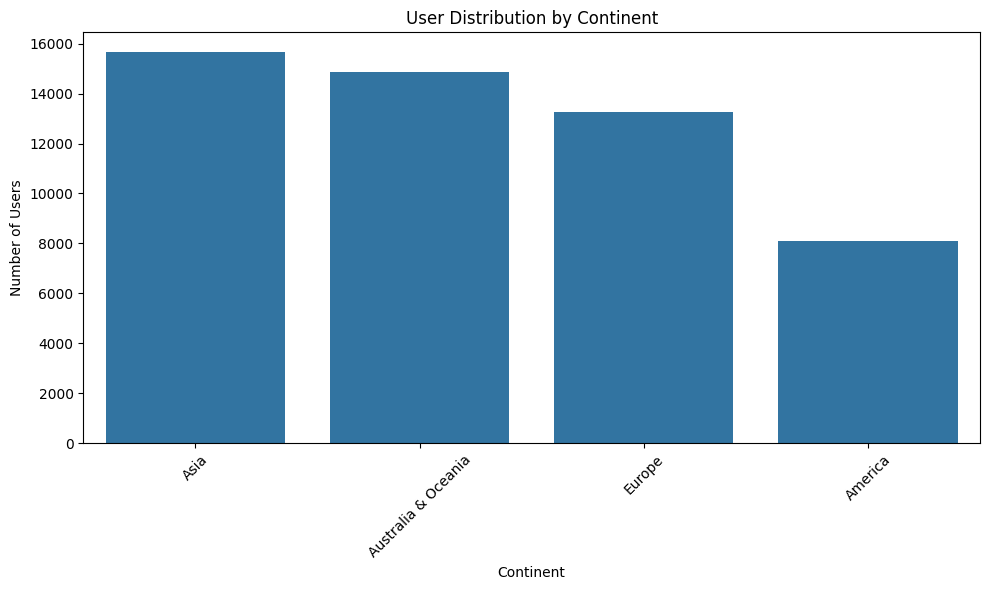

In [ ]:
#User Distribution by Continent
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Continent', order=df_final['Continent'].value_counts().index)
plt.title('User Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

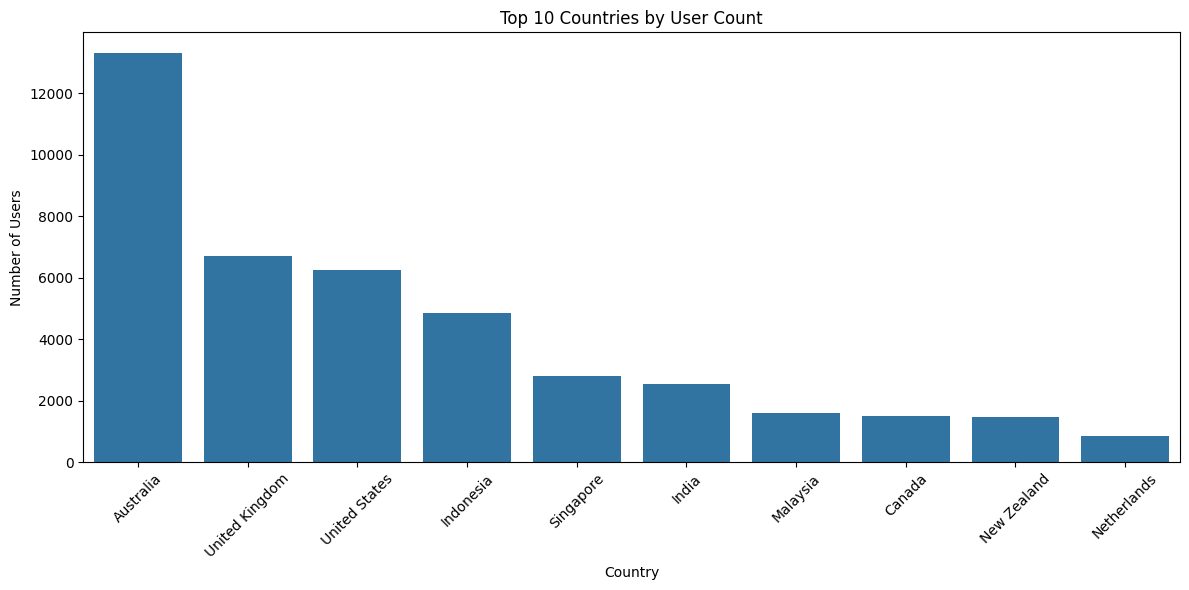

In [ ]:
#User Distribution by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Country', order=df_final['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries by User Count')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

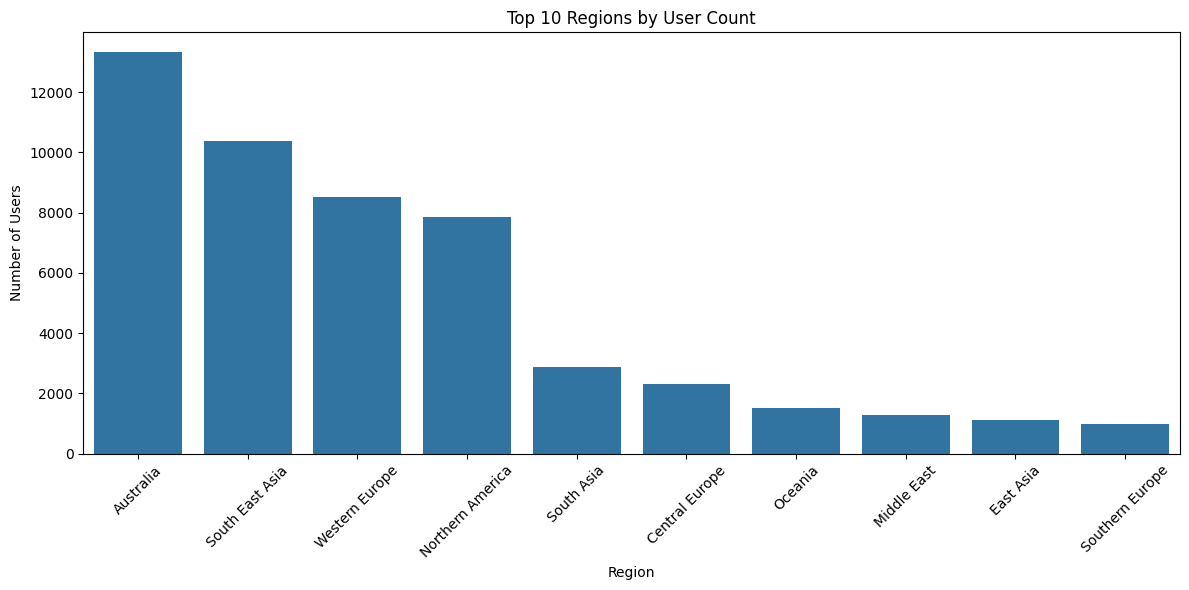

In [ ]:
#User Distribution by Region
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Region', order=df_final['Region'].value_counts().head(10).index)
plt.title('Top 10 Regions by User Count')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here most of users prefers Australia as maximum tourist attraction

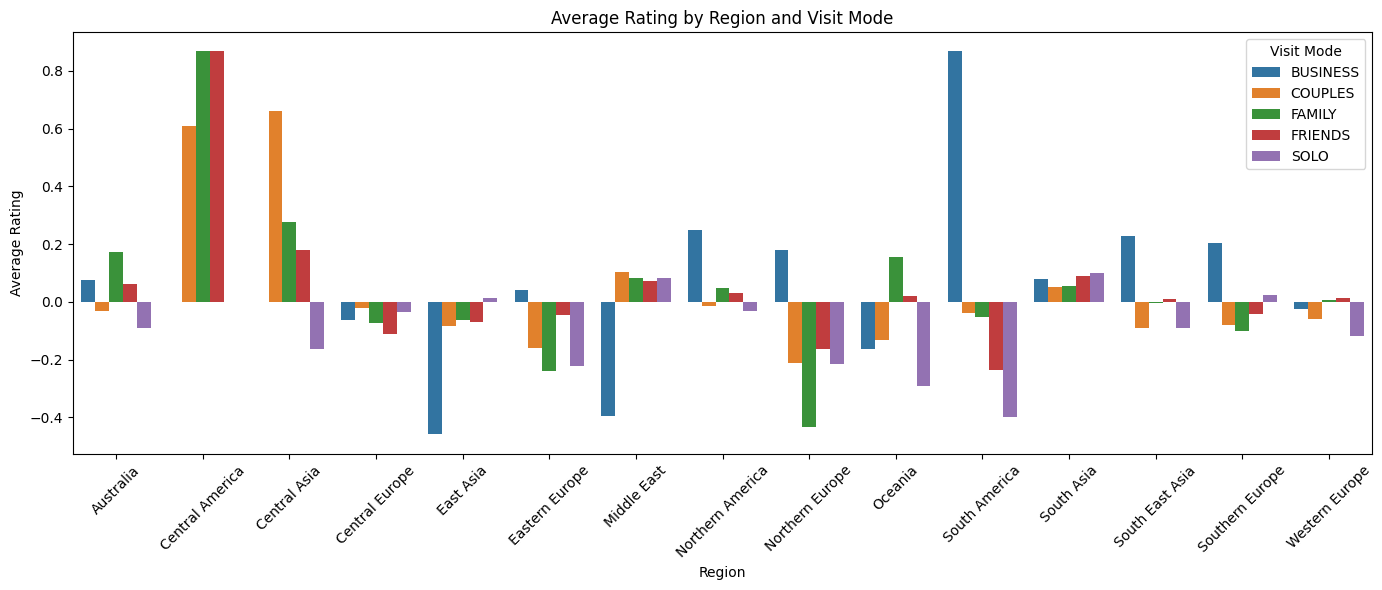

In [ ]:
#Average Rating by Region and Visit Mode
region_visitmode_stats = df_final.groupby(['Region', 'VisitMode']).agg(
    avg_rating=('Rating', 'mean'),
    user_count=('UserId', 'count')
).reset_index()

# Plot average rating
plt.figure(figsize=(14, 6))
sns.barplot(data=region_visitmode_stats, x='Region', y='avg_rating', hue='VisitMode')
plt.title('Average Rating by Region and Visit Mode')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Visit Mode')
plt.tight_layout()
plt.show()

1. From this, Australia has higher number of tourism region, followed by South East Asia
2. Australia is the neutral venue for business, couples and family visist
South America region is good place for business visist
3. Central America is good for couples, family and friends
4. East asia and middle east is not good for business purpose


<ipython-input-37-454068c52d90>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attraction_rating.index, y=attraction_rating.values, palette='viridis')


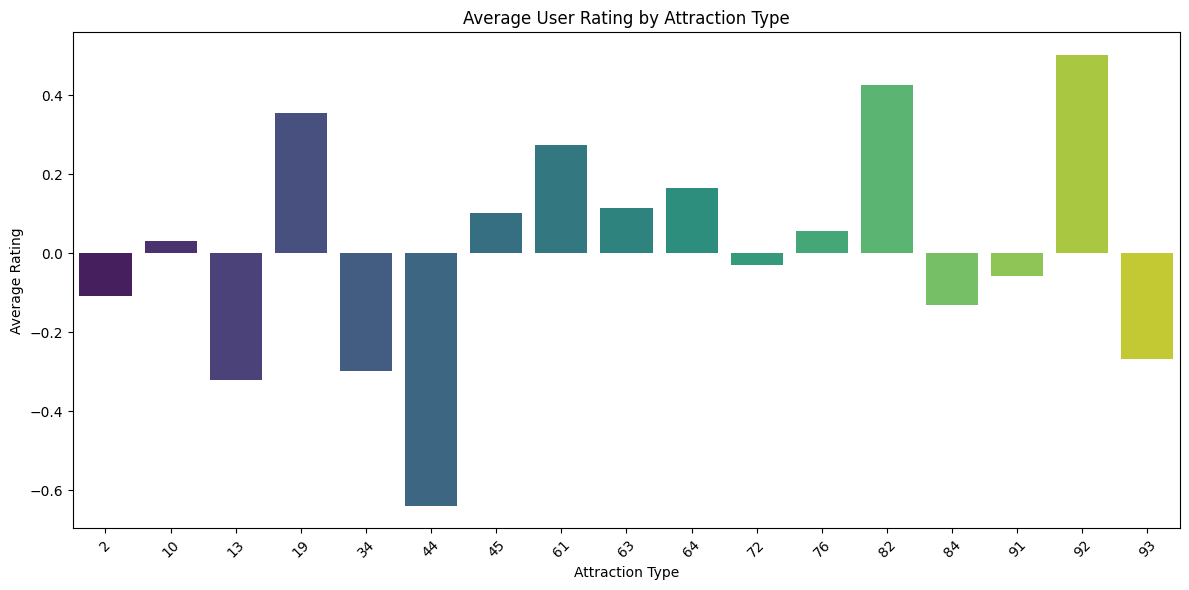

In [ ]:
# Average Rating by Attraction Type
attraction_rating = df_final.groupby('AttractionTypeId')['Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attraction_rating.index, y=attraction_rating.values, palette='viridis')
plt.title('Average User Rating by Attraction Type')
plt.xlabel('Attraction Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-38-048717253ad4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attraction_counts.index, y=attraction_counts.values, palette='magma')


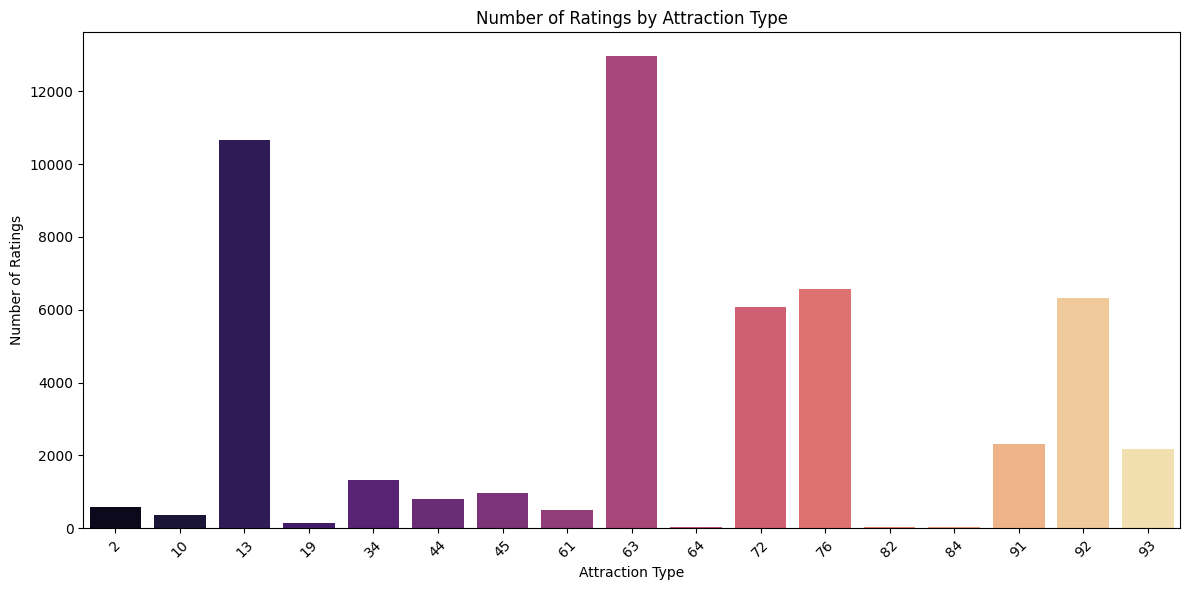

In [ ]:
#Count of Ratings by Attraction Type (Popularity)
attraction_counts = df_final['AttractionTypeId'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attraction_counts.index, y=attraction_counts.values, palette='magma')
plt.title('Number of Ratings by Attraction Type')
plt.xlabel('Attraction Type')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Attraction type 13, 44, 93, 34 has maximum amount of negative rating, Out of these attraction type 13 has maximum number of rating but it was on negative side, and 44 rating number are less but no one has enjoyed this attraction

2. 63 and 92 have good ratings on the positive side

3. Attraction type 72, 76 has mixed rating and so average rating on neutral side, Need some improvement in these areas for maximum users for this attraction

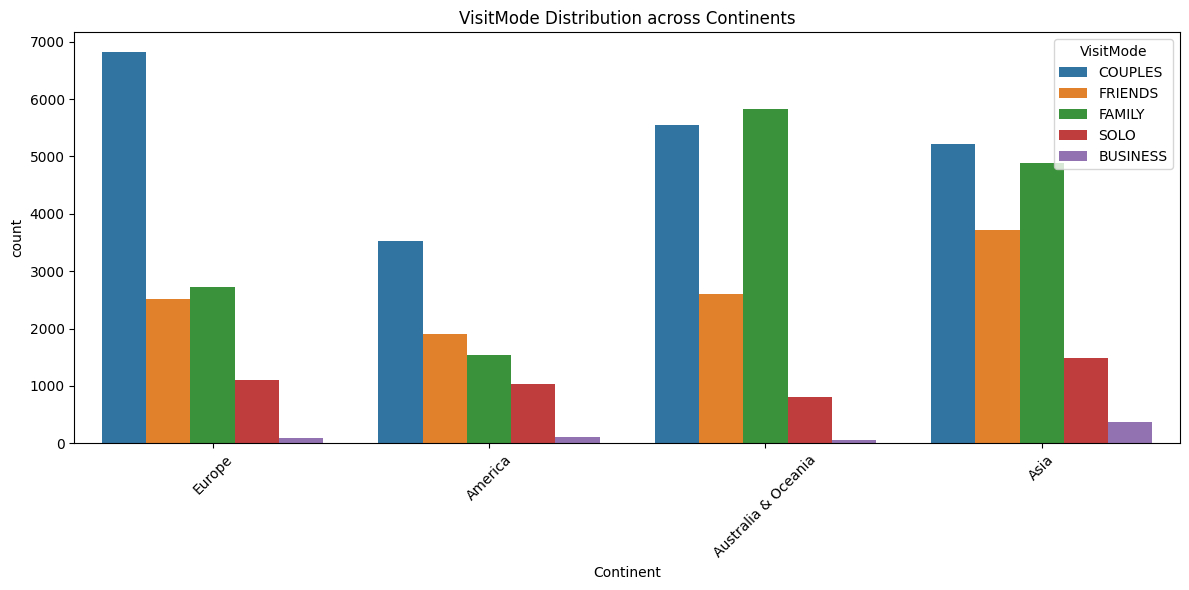

In [ ]:
#VisitMode Distribution across Continents
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Continent', hue='VisitMode')
plt.title('VisitMode Distribution across Continents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

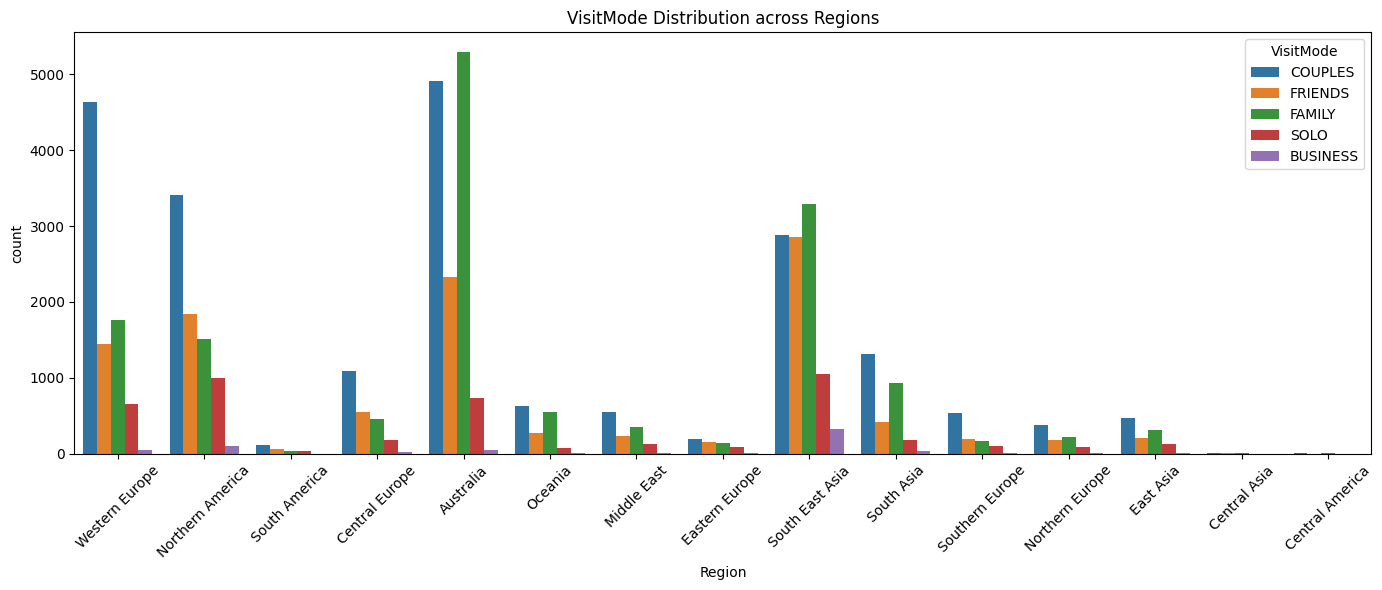

In [ ]:
#VisitMode Distribution across Regions
plt.figure(figsize=(14, 6))
sns.countplot(data=df_final, x='Region', hue='VisitMode')
plt.title('VisitMode Distribution across Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
visitmode_continent = pd.crosstab(df_final['VisitMode'], df_final['Continent'], normalize='index')
print(visitmode_continent)

Continent   America      Asia  Australia & Oceania    Europe
VisitMode                                                   
BUSINESS   0.163166  0.596123             0.088853  0.151858
COUPLES    0.166848  0.247028             0.263036  0.323088
FAMILY     0.102988  0.325840             0.389074  0.182097
FRIENDS    0.177046  0.345982             0.242775  0.234197
SOLO       0.231986  0.336119             0.182065  0.249831


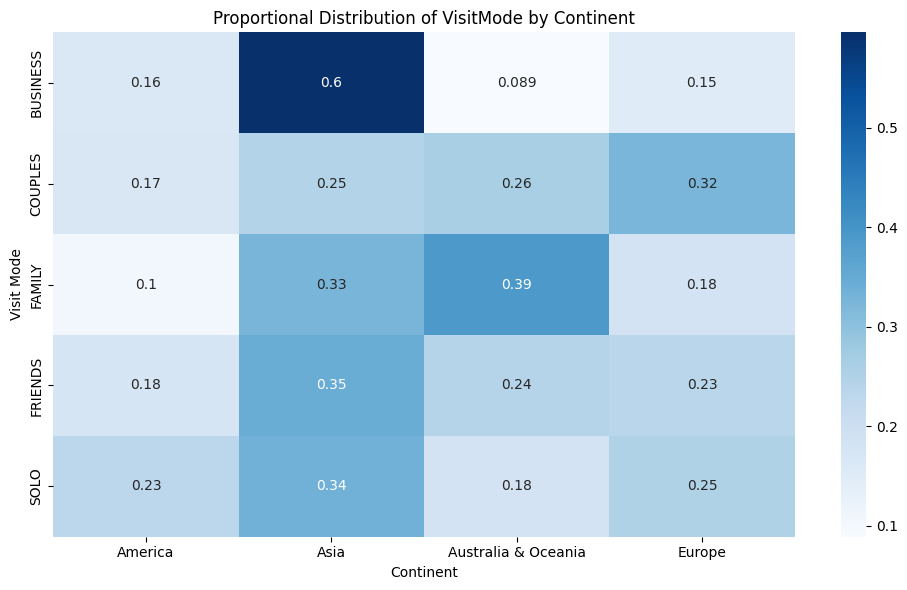

In [ ]:
#Distribution of VisitMode by Continent
plt.figure(figsize=(10, 6))
sns.heatmap(visitmode_continent, annot=True, cmap='Blues')
plt.title('Proportional Distribution of VisitMode by Continent')
plt.ylabel('Visit Mode')
plt.xlabel('Continent')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_final['VisitMode'], df_final['Continent'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.0


From this value, we can make the conclusion that VisitMode and Continent are correleated

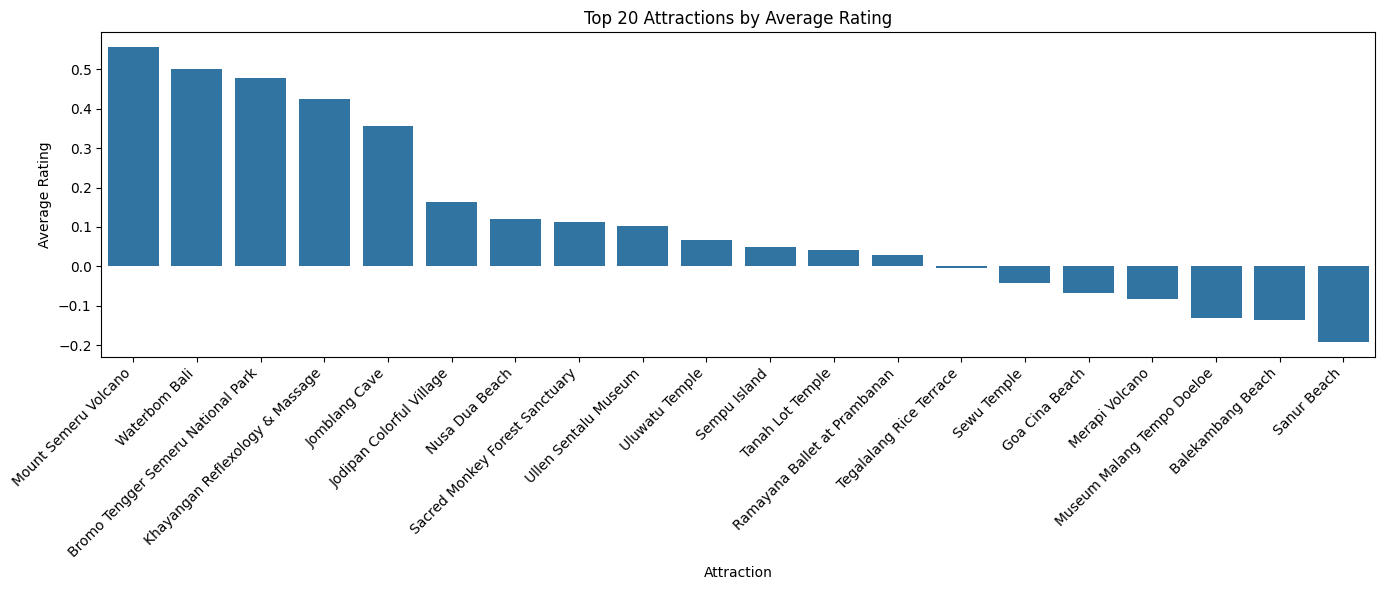

In [ ]:
#Distribution of Ratings by Attraction
attraction_ratings = df_final.groupby('Attraction')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=attraction_ratings.index[:20], y=attraction_ratings.values[:20])  # top 20 attractions
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Attractions by Average Rating")
plt.ylabel("Average Rating")
plt.xlabel("Attraction")
plt.tight_layout()
plt.show()

In [ ]:
# Group by Attraction and get mean rating
top_rated = df_final.groupby('Attraction')[['Rating']].mean().sort_values(by='Rating', ascending=False).head(10)
low_rated = df_final.groupby('Attraction')[['Rating']].mean().sort_values(by='Rating').head(10)

print("🔝 Top 10 Rated Attractions:")
print(top_rated)

print("\n🔻 Bottom 10 Rated Attractions:")
print(low_rated)

🔝 Top 10 Rated Attractions:
                                      Rating
Attraction                                  
Mount Semeru Volcano                0.556500
Waterbom Bali                       0.501567
Bromo Tengger Semeru National Park  0.478694
Khayangan Reflexology & Massage     0.425162
Jomblang Cave                       0.355326
Jodipan Colorful Village            0.164020
Nusa Dua Beach                      0.120572
Sacred Monkey Forest Sanctuary      0.113454
Ullen Sentalu Museum                0.101686
Uluwatu Temple                      0.067293

🔻 Bottom 10 Rated Attractions:
                            Rating
Attraction                        
Kuta Beach - Bali        -0.767621
Yogyakarta Palace        -0.639611
Malang City Square       -0.599108
Seminyak Beach           -0.366834
Water Castle (Tamansari) -0.354835
Kalibiru National Park   -0.322723
Malioboro Road           -0.298142
Tegenungan Waterfall     -0.269581
Ratu Boko Temple         -0.229793
Coban Rondo Wat

In [ ]:
target = 'Rating'

# Example features – adjust based on EDA and feature engineering
features = [
    'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId', 'AttractionId',
    'AttractionCityId', 'ContinentId_x', 'RegionId_x', 'CountryId_x', 'CityId'
]

X = df_final[features]
y = df_final[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. R-Squared (R2)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Mean Absolute Error (MAE) : {mae}")
print(f"Root Mean Squared Error (RMSE) : {rmse}")
print(f"R2 Score : {r2}")

Mean Squared Error (MSE) : 0.9541081879183387
Mean Absolute Error (MAE) : 0.769810024943408
Root Mean Squared Error (RMSE) : 0.9767846169541875
R2 Score : 0.037142829708063485


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("📊 XGBoost Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 XGBoost Regression Metrics:
Mean Squared Error (MSE): 0.8770
Mean Absolute Error (MAE): 0.7335
Root Mean Squared Error (RMSE): 0.9365
R² Score: 0.1150


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regressor Performance:
MAE: 0.7316
RMSE: 0.9337
R² Score: 0.1203


since the model is underfitting, again doing some feature engineering

In [ ]:
df_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,54,774.0,America,South America,2,Brazil,9,Brazil,51.0,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,159,7460.0,Europe,Western Europe,5,France,21,Lyon,159.0,2018-09-01
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0,2016-02-01


In [ ]:
# Average rating per user
user_avg_rating = df_copy.groupby('UserId')['Rating'].mean().rename('UserAvgRating')

# Count of visits per user
user_total_visits = df_copy.groupby('UserId').size().rename('UserVisitCount')

# Merge back
df_copy = df_copy.merge(user_avg_rating, on='UserId')
df_copy = df_copy.merge(user_total_visits, on='UserId')

In [ ]:
# Average rating per attraction
attr_avg_rating = df_copy.groupby('AttractionId')['Rating'].mean().rename('AttrAvgRating')

# Number of times attraction was visited
attr_visit_count = df_copy.groupby('AttractionId').size().rename('AttrVisitCount')

# Merge
df_copydf_copy = df_copy.merge(attr_avg_rating, on='AttractionId')
df_copy = df_copy.merge(attr_visit_count, on='AttractionId')

In [ ]:
# Combine VisitMode and Region to capture interaction
df_copy['VisitMode_Region'] = df_copy['VisitMode'] + '_' + df_copy['Region']

In [ ]:
# Convert VisitDate to datetime
df_copy['VisitDate'] = pd.to_datetime(df_copy['VisitDate'])

# Extract month and day features
df_copy['VisitMonth'] = df_copy['VisitDate'].dt.month
df_copy['VisitDay'] = df_copy['VisitDate'].dt.day
df_copy['VisitDayOfWeek'] = df_copy['VisitDate'].dt.dayofweek

In [ ]:
# User's average rating per VisitMode
user_visitmode_avg = df_copy.groupby(['UserId', 'VisitMode'])['Rating'].mean().unstack().fillna(0)
user_visitmode_avg.columns = [f'UserAvgRating_{col}' for col in user_visitmode_avg.columns]
df_copy = df_copy.merge(user_visitmode_avg, on='UserId', how='left')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['VisitMode', 'Region', 'Country', 'Continent', 'AttractionTypeId', 'VisitMode_Region']
df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

In [ ]:
drop_cols = ['TransactionId', 'UserId', 'Attraction', 'AttractionAddress', 'CityName', 'VisitDate']

df_encoded.select_dtypes(include=['object']).columns

Index(['Attraction', 'AttractionAddress', 'CityName'], dtype='object')

In [ ]:
df_model = df_encoded.drop(columns=drop_cols, errors='ignore')

In [ ]:
df_model.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [ ]:
df_model.drop(columns= ['VisitMode_Region'], errors='ignore')

,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,ContinentId_x,RegionId_x,CountryId_x,CityId,...,VisitMode_Region_SOLO_Eastern Europe,VisitMode_Region_SOLO_Middle East,VisitMode_Region_SOLO_Northern America,VisitMode_Region_SOLO_Northern Europe,VisitMode_Region_SOLO_Oceania,VisitMode_Region_SOLO_South America,VisitMode_Region_SOLO_South Asia,VisitMode_Region_SOLO_South East Asia,VisitMode_Region_SOLO_Southern Europe,VisitMode_Region_SOLO_Western Europe
0,2022,10,2,640,5,1,5,21,163,4341.0,...,False,False,False,False,False,False,False,False,False,False
1,2022,10,4,640,5,1,2,8,48,464.0,...,False,False,False,False,False,False,False,False,False,False
2,2022,10,3,640,5,1,2,9,54,774.0,...,False,False,False,False,False,False,False,False,False,False
3,2022,10,3,640,3,1,5,17,135,583.0,...,False,False,False,False,False,False,False,False,False,False
4,2022,10,2,640,3,1,5,21,163,1396.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,2018,9,2,1297,4,3,5,21,159,7460.0,...,False,False,False,False,False,False,False,False,False,False
51875,2016,2,2,1297,5,3,5,17,133,6164.0,...,False,False,False,False,False,False,False,False,False,False
51876,2016,2,2,1297,4,3,5,17,133,6164.0,...,False,False,False,False,False,False,False,False,False,False
51877,2016,2,2,1297,4,3,5,17,133,6164.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Separate features and target
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 XGBoost Model Metrics (df_encoded):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 XGBoost Model Metrics (df_encoded):
Mean Squared Error (MSE): 0.2012
Mean Absolute Error (MAE): 0.2298
Root Mean Squared Error (RMSE): 0.4486
R² Score: 0.7841


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression  Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Decision Tree Regression  Metrics:
Mean Squared Error (MSE): 0.4472
Mean Absolute Error (MAE): 0.2941
Root Mean Squared Error (RMSE): 0.6687
R² Score: 0.5202


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=150,max_depth=12,random_state=42,n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regressor Performance:
MAE: 0.2475
RMSE: 0.4815
R² Score: 0.7512


Classification model

In [ ]:
df_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,UserVisitCount,AttrVisitCount,VisitMode_Region,VisitDay,VisitDayOfWeek,UserAvgRating_BUSINESS,UserAvgRating_COUPLES,UserAvgRating_FAMILY,UserAvgRating_FRIENDS,UserAvgRating_SOLO
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,1,12915,COUPLES_Western Europe,1,5,0.0,5.0,0.0,0.0,0.0
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,1,12915,FRIENDS_Northern America,1,5,0.0,0.0,0.0,5.0,0.0
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,1,12915,FAMILY_South America,1,5,0.0,0.0,5.0,0.0,0.0
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,2,12915,FAMILY_Central Europe,1,5,0.0,0.0,3.0,0.0,0.0
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,3,12915,COUPLES_Western Europe,1,5,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,4,798,COUPLES_Western Europe,1,5,0.0,3.0,0.0,0.0,0.0
51875,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,4,798,COUPLES_Central Europe,1,0,0.0,4.5,0.0,0.0,0.0
51876,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,4,798,COUPLES_Central Europe,1,0,0.0,4.5,0.0,0.0,0.0
51877,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,4,798,COUPLES_Central Europe,1,0,0.0,4.5,0.0,0.0,0.0


In [ ]:
df_classification = df_copy.copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
target = 'VisitMode'

# Features
features = ['ContinentId_x', 'Region', 'Country', 'CityId',
            'AttractionTypeId', 'VisitYear', 'VisitMonth']

# Handle categorical encoding
for col in features + [target]:
    if df_classification[col].dtype == 'object':
        le = LabelEncoder()
        df_classification[col] = le.fit_transform(df_classification[col])

X = df_classification[features]
y = df_classification[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.20      0.25       128
           1       0.54      0.62      0.57      4243
           2       0.49      0.49      0.49      2997
           3       0.36      0.32      0.34      2114
           4       0.32      0.22      0.26       894

    accuracy                           0.48     10376
   macro avg       0.41      0.37      0.38     10376
weighted avg       0.47      0.48      0.47     10376

Confusion Matrix:
 [[  26   31   29   32   10]
 [  13 2610  832  596  192]
 [  17 1004 1461  399  116]
 [  22  856  462  673  101]
 [   3  370  169  152  200]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = [ 'Region', 'Country', 'Continent', 'AttractionTypeId', 'VisitMode_Region']
df_enc = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

In [ ]:
df_enc.select_dtypes(include=['object']).columns

Index(['Attraction', 'AttractionAddress', 'VisitMode', 'CityName'], dtype='object')

In [ ]:
cate_col = ['Attraction', 'AttractionAddress', 'CityName']
df_enc = pd.get_dummies(df_enc, columns=cate_col, drop_first=True)

In [ ]:
X = df_enc.drop('VisitMode', axis=1)  # Features
y = df_enc['VisitMode']               # Target (encoded: 0,1,2,...)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (SVM is sensitive to feature scale!)
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

#need the scaled data back in the original DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    BUSINESS       1.00      0.95      0.98       124
     COUPLES       1.00      1.00      1.00      4223
      FAMILY       1.00      1.00      1.00      2999
     FRIENDS       1.00      1.00      1.00      2145
        SOLO       1.00      1.00      1.00       885

    accuracy                           1.00     10376
   macro avg       1.00      0.99      0.99     10376
weighted avg       1.00      1.00      1.00     10376


Confusion Matrix:
[[ 118    6    0    0    0]
 [   0 4222    1    0    0]
 [   0    0 2996    3    0]
 [   0    0    1 2143    1]
 [   0    0    0    4  881]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    BUSINESS       0.91      0.96      0.93       124
     COUPLES       0.97      0.98      0.97      4223
      FAMILY       0.95      0.95      0.95      2999
     FRIENDS       0.95      0.95      0.95      2145
        SOLO       0.97      0.93      0.95       885

    accuracy                           0.96     10376
   macro avg       0.95      0.95      0.95     10376
weighted avg       0.96      0.96      0.96     10376


Confusion Matrix:
[[ 119    5    0    0    0]
 [   7 4135   77    4    0]
 [   2  110 2837   45    5]
 [   3    9   65 2044   24]
 [   0    1    9   54  821]]


From above classification model, KNN performs best.

Recommendation systen

In [ ]:
user_item_matrix = df_enc.pivot_table(index='UserId', columns='AttractionId', values='Rating').fillna(0)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute user-user similarity matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [ ]:
def recommend_attractions(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User {user_id} not found in dataset."

    # Find similar users (excluding the user itself)
    sim_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]  # Top 5 similar users

    # Weighted sum of ratings from similar users
    weighted_scores = pd.Series(dtype='float64')

    for other_user, similarity in sim_users.items():
        weighted_scores = weighted_scores.add(user_item_matrix.loc[other_user] * similarity, fill_value=0)

    # Remove already visited attractions
    visited = user_item_matrix.loc[user_id]
    recommendations = weighted_scores[visited == 0].sort_values(ascending=False).head(top_n)

    return recommendations.index.tolist()

In [ ]:
df_enc

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,VisitMode,ContinentId_x,...,CityName_Zhuhai,CityName_Zielona Gora,CityName_Zilina,CityName_Zoetermeer,CityName_Zoutelande,CityName_Zoutleeuw,CityName_Zug,CityName_Zurich,CityName_Zushi,CityName_Zwolle
0,3,70456,2022,10,2,640,5,1,COUPLES,5,...,False,False,False,False,False,False,False,False,False,False
1,8,7567,2022,10,4,640,5,1,FRIENDS,2,...,False,False,False,False,False,False,False,False,False,False
2,9,79069,2022,10,3,640,5,1,FAMILY,2,...,False,False,False,False,False,False,False,False,False,False
3,10,31019,2022,10,3,640,3,1,FAMILY,5,...,False,False,False,False,False,False,False,True,False,False
4,15,43611,2022,10,2,640,3,1,COUPLES,5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,211227,87100,2018,9,2,1297,4,3,COUPLES,5,...,False,False,False,False,False,False,False,False,False,False
51875,211238,88112,2016,2,2,1297,5,3,COUPLES,5,...,False,False,False,False,False,False,False,False,False,False
51876,211239,88112,2016,2,2,1297,4,3,COUPLES,5,...,False,False,False,False,False,False,False,False,False,False
51877,211240,88112,2016,2,2,1297,4,3,COUPLES,5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
user_id = 70456
top_recommendations = recommend_attractions(user_id, top_n=5)
print(f"Top recommendations for User {user_id}: {top_recommendations}")

Top recommendations for User 70456: [369, 481, 650, 673, 737]


In [ ]:
import pickle

# Save the encoded dataset
df_enc.to_pickle("df_encoded.pkl")

# Optionally save user-item matrix (can be recomputed too)
user_item_matrix.to_pickle("user_item_matrix.pkl")

# Save similarity matrix
user_similarity_df.to_pickle("user_similarity_df.pkl")

KeyboardInterrupt: 

In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505206 sha256=9821f4f7eada8fce01bdbaa3f43f73649396e0230fae7ec73de0ee50cc9d6f6d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
pip uninstall thinc

Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/thinc-8.3.6.dist-info/*
    /usr/local/lib/python3.11/dist-packages/thinc/*
Proceed (Y/n)? Y
  Successfully uninstalled thinc-8.3.6


In [ ]:
pip uninstall tensorflow numba

Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Would remove:
    /usr/local/bin/numba
    /usr/local/lib/python3.11/dist-packages/numba-0.60.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numba/*
Proceed (Y/n)? Y
  Successfully uninstalled numba-0.60.0


In [ ]:
pip install numpy==1.26.4

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pickle

# Load data
df = pd.read_excel("df_cleaned.xlsx")

# Filter relevant columns
data = df[['UserId', 'AttractionId', 'Rating']]

# Define Reader object
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data, reader)

# Split the data
trainset, testset = train_test_split(surprise_data, test_size=0.2)

# Build model
model = SVD()
model.fit(trainset)

# Evaluate
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

# Save the model
with open("svd_model.pkl", "wb") as f:
    pickle.dump(model, f)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).